# Taller: Análisis de Instagram con Apify API + Gemini  

Fecha de generación: 2025-05-21


**Objetivos**

1. Obtener datos públicos de Instagram usando el actor **`apify/instagram-api-scraper`**.  
2. Limpiar y pre‑procesar captions e información de posts (descriptiva de los captions).  
3. Clasificar sentimiento de captions con la API de Google Generative AI (Gemini).  
4. Extraer temas dominantes con LDA y nombrarlos con Gemini. Crear Prompt
6. Diseñar una micro‑campaña basada en los insights descubiertos.


In [1]:
import pandas as pd
import requests
import google.generativeai as palm

In [2]:
# 🔑 Introduce tu token de Apify y de Google Generative AI (Gemini)
import os

In [3]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/TercerCorte/instagram_disney.csv

--2025-11-19 23:38:20--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/TercerCorte/instagram_disney.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/TercerCorte/instagram_disney.csv [following]
--2025-11-19 23:38:20--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/TercerCorte/instagram_disney.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10377469 (9.9M) [text/plain]
Saving to: ‘instagram_disney.csv’

instagram_disney.cs 100%[===================>]   9

In [4]:
import pandas as pd

df = pd.read_csv("instagram_disney.csv")


In [5]:
df

,inputUrl,id,username,url,fullName,biography,externalUrls,followersCount,followsCount,hasChannel,...,videoDuration,musicInfo.artist_name,musicInfo.song_name,musicInfo.uses_original_audio,musicInfo.should_mute_audio,musicInfo.should_mute_audio_reason,musicInfo.audio_id,taggedUsers,coauthorProducers,isPinned
0,https://www.instagram.com/disneylat/,3626608212947059675,disneylat,https://www.instagram.com/p/DJUTPSAOUPb/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.instagram.com/disneylat/,3636752063146304692,disneylat,https://www.instagram.com/p/DJ4VrusASS0/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.instagram.com/disneylat/,3629059382491345626,disneylat,https://www.instagram.com/p/DJdAkfiMfLa/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,59.179,sacqspot,Original audio,True,False,NaN,6.053466e+14,NaN,NaN,NaN
3,https://www.instagram.com/disneylat/,3624961017727223603,disneylat,https://www.instagram.com/p/DJOctb6RQcz/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.instagram.com/disneylat/,3634637246638652679,disneylat,https://www.instagram.com/p/DJw01GVTP0H/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,https://www.instagram.com/disneylat/,3378657362149709028,disneylat,https://www.instagram.com/p/C7jZvhQsRTk/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,115.115,disneyprincesala,Original audio,True,False,NaN,9.840821e+14,"[{'full_name': 'Disney', 'id': '2957422264', '...","[{'id': '2957422264', 'is_verified': True, 'pr...",NaN
196,https://www.instagram.com/disneylat/,3333366985910424893,disneylat,https://www.instagram.com/p/C5Cf5zdNJU9/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,https://www.instagram.com/disneylat/,3331639585011555501,disneylat,https://www.instagram.com/p/C48XI0APlyt/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,https://www.instagram.com/disneylat/,3329464423368675903,disneylat,https://www.instagram.com/p/C40okC3MNI_/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



### 🔍 Preguntas – Sección 1 (Exploración)
Mire las columnas de su dataset y responda
1. ¿Cuántos posts hay en total?  
2. ¿Qué tipos de contenido (imagen, vídeo, carrusel) predominan?  (mira la columna type)
3. ¿Cuál es el rango de fechas cubierto por los posts?  
4. ¿Qué post obtuvo más 'likes' y cuál crees que es la razón?


In [6]:
num_posts = len(df)
print("Número total de posts:", num_posts)


Número total de posts: 200


In [7]:
type_counts = df["type"].value_counts()
print(type_counts)

# Para mostrar porcentajes:
type_percent = df["type"].value_counts(normalize=True) * 100
print(type_percent)

type
Video      83
Sidecar    67
Image      50
Name: count, dtype: int64
type
Video      41.5
Sidecar    33.5
Image      25.0
Name: proportion, dtype: float64


In [10]:
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

In [11]:
fecha_min = df["timestamp"].min()
fecha_max = df["timestamp"].max()

print("Rango de fechas:", fecha_min, "→", fecha_max)

Rango de fechas: 2024-03-16 17:00:01+00:00 → 2025-05-20 21:00:01+00:00


In [9]:
# Encuentra el índice del post con más likes
idx_max_likes = df["likesCount"].idxmax()

# Obtener toda la fila
top_post = df.loc[idx_max_likes]
print(top_post)

inputUrl                                           https://www.instagram.com/disneylat/
id                                                                  3506371026641991220
username                                                                      disneylat
url                                            https://www.instagram.com/p/DCpId8Ft7Y0/
fullName                                                                         Disney
biography                               La cuenta oficial de Disney para Latinoamérica.
externalUrls                                                                         []
followersCount                                                                   569613
followsCount                                                                         36
hasChannel                                                                        False
highlightReelCount                                                                   13
isBusinessAccount               


## 🧹 Sección 2 (Limpieza)

Explica por qué es importante limpiar y normalizar el texto de los captions.  
Entregue un grafico de barras con las frecuencia en los captions

In [22]:
import re

def limpiar_caption(texto):
    if pd.isna(texto):
        return ""

    texto = str(texto)

    # Quitar URLs
    texto = re.sub(r'http\S+|www\.\S+', '', texto)

    # Quitar menciones y hashtags
    texto = re.sub(r'[@#]\w+', '', texto)

    # Quitar emojis
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        "]+", flags=re.UNICODE)
    texto = emoji_pattern.sub(r'', texto)

    # Quitar caracteres no alfabéticos excepto espacios
    texto = re.sub(r'[^a-zA-ZáéíóúñÁÉÍÓÚÑüÜ ]', ' ', texto)

    # Minúsculas
    texto = texto.lower()

    # Espacios dobles
    texto = re.sub(r'\s+', ' ', texto).strip()

    return texto

df["caption_limpio"] = df["caption"].apply(limpiar_caption)

df[["caption", "caption_limpio"]].head()

,caption,caption_limpio
0,"En cada imagen se esconde un Mickey, ¿puedes e...",en cada imagen se esconde un mickey puedes enc...
1,Esto se va a descontrolar.,esto se va a descontrolar
2,Los 2000 hechos canción. \n\nVuelve a ver #Liz...,los hechos canción vuelve a ver estrella pop en
3,Con ser ella misma alcanzaba 🥹\n\n#Mulán dispo...,con ser ella misma alcanzaba disponible solo en
4,"Llevábamos años esperando este momento, y no d...",llevábamos años esperando este momento y no de...


In [23]:
df.columns
df["caption_limpio"].head()

,caption_limpio
0,en cada imagen se esconde un mickey puedes enc...
1,esto se va a descontrolar
2,los hechos canción vuelve a ver estrella pop en
3,con ser ella misma alcanzaba disponible solo en
4,llevábamos años esperando este momento y no de...


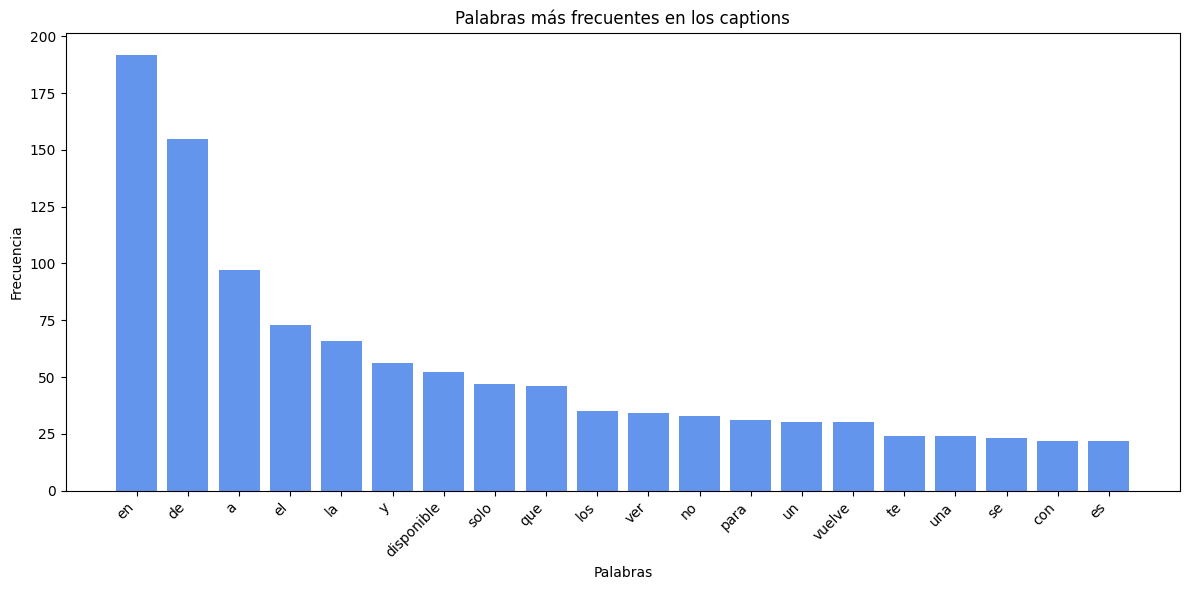

In [24]:
import matplotlib.pyplot as plt
from collections import Counter
import re

# Unir todos los captions limpios
texto_total = " ".join(df["caption_limpio"].dropna())

# Separar palabras
palabras = re.findall(r'\b[a-záéíóúñü]+\b', texto_total)

# Contar frecuencia
frecuencias = Counter(palabras)

# 20 palabras más comunes
top_n = 20
palabras_comunes = frecuencias.most_common(top_n)

# Preparar datos
labels = [p[0] for p in palabras_comunes]
counts = [p[1] for p in palabras_comunes]

# Graficar
plt.figure(figsize=(12, 6))
plt.bar(labels, counts, color='cornflowerblue')
plt.xticks(rotation=45, ha='right')
plt.title("Palabras más frecuentes en los captions")
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


## 🗂 Sección 3 (Temas)
5. Pida a chatgpt o a una IA que le de 3 temas para clasificar un caption y denle un ejemplo.
6. Escriba un prompt en donde le pida clasificar un caption y que de respuesta solo regrese una palabra.
7. Apliquelo en toda la columna caption creando una columna topics.

10. Lista los nombres de los temas generados. ¿Alguno es inesperado?  
11. Con un heatmap *tipo de contenido × tema*, indica qué tema es “propiedad” de cada formato.  
12. Para el tema dominante, proporciona dos insights accionables.


In [12]:
df.head()

,inputUrl,id,username,url,fullName,biography,externalUrls,followersCount,followsCount,hasChannel,...,videoDuration,musicInfo.artist_name,musicInfo.song_name,musicInfo.uses_original_audio,musicInfo.should_mute_audio,musicInfo.should_mute_audio_reason,musicInfo.audio_id,taggedUsers,coauthorProducers,isPinned
0,https://www.instagram.com/disneylat/,3626608212947059675,disneylat,https://www.instagram.com/p/DJUTPSAOUPb/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.instagram.com/disneylat/,3636752063146304692,disneylat,https://www.instagram.com/p/DJ4VrusASS0/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.instagram.com/disneylat/,3629059382491345626,disneylat,https://www.instagram.com/p/DJdAkfiMfLa/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,59.179,sacqspot,Original audio,True,False,NaN,6.053466e+14,NaN,NaN,NaN
3,https://www.instagram.com/disneylat/,3624961017727223603,disneylat,https://www.instagram.com/p/DJOctb6RQcz/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.instagram.com/disneylat/,3634637246638652679,disneylat,https://www.instagram.com/p/DJw01GVTP0H/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
import requests
import json

In [38]:
import os
os.environ["OPENAI_API_KEY"] =
from openai import OpenAI

client = OpenAI()

SyntaxError: invalid syntax (ipython-input-2256066974.py, line 2)

In [15]:
from openai import OpenAI

client = OpenAI()


In [16]:
def suma(a,b):
 return a+b

In [17]:
suma(5,10)

15

In [18]:
def call_llm(prompt):
  response = client.responses.create(
  model="gpt-4o-mini",
  input=prompt
)
  return response.output_text



In [19]:
call_llm("hola")

'¡Hola! ¿Cómo puedo ayudarte hoy?'

In [20]:
def classify_topics(text):
  prompt = (f"Clasifica por tematicas el siguiente caption:{text} "
              f"solo tienes entre estos temas juegos_desafios, promocion, personajes. solo responde con una palabra")
  try:
    respuesta = call_llm(prompt)
  except:
    respuesta = "deafult"
  return respuesta

In [26]:
prompt = """
Genera 3 temas que sirvan para clasificar captions de Instagram de marcas como Disney.
Proporciona los nombres y un ejemplo breve de caption para cada tema.
"""

print(call_llm(prompt))

Claro, aquí tienes tres temas para clasificar captions de Instagram de marcas como Disney, junto con ejemplos breves:

### 1. **Magia y Fantasía**

**Caption Ejemplo:**  
"Sumérgete en un mundo de sueños donde la magia nunca termina. ✨ #DisneyMagic"

### 2. **Aventuras y Exploración**

**Caption Ejemplo:**  
"Cada rincón del parque es una nueva aventura. ¿Listo para explorar? 🌍🏰 #DisneyAdventures"

### 3. **Recuerdos y Nostalgia**

**Caption Ejemplo:**  
"Los mejores recuerdos se crean en compañía de quienes amas. ❤️✨ #DisneyMemories"


In [28]:
def clasificar_caption(caption):
    prompt = f"""
Clasifica el siguiente caption en uno de estos 3 temas:
1) magia
2) personajes
3) lanzamientos

Responde SOLO con una palabra: magia, personajes o lanzamientos.

Caption:
"{caption}"
"""
    return call_llm(prompt).strip().lower()

df["topics"] = df["caption"].astype(str).apply(clasificar_caption)
df["topics"].value_counts()

,count
topics,
lanzamientos,92
personajes,89
magia,19




## 📝 Sección 4 (Micro‑campaña)

Cree una columna para una publicidad especifica:


In [29]:
import pandas as pd

# Lista de diccionarios con la información
datos = [
    {"Nombre": "Ana Torres", "Personaje de Interés": "Estudiante universitaria", "Rango de Edad": "18-24", "Producto a Vender": "Laptop económica"},
    {"Nombre": "Carlos Pérez", "Personaje de Interés": "Emprendedor digital", "Rango de Edad": "25-34", "Producto a Vender": "Software de productividad"},
    {"Nombre": "Lucía Gómez", "Personaje de Interés": "Madre primeriza", "Rango de Edad": "25-34", "Producto a Vender": "Pañales ecológicos"},
    {"Nombre": "Marco Díaz", "Personaje de Interés": "Gamer profesional", "Rango de Edad": "18-24", "Producto a Vender": "Silla ergonómica para gaming"},
    {"Nombre": "Teresa Ríos", "Personaje de Interés": "Ejecutiva de marketing", "Rango de Edad": "35-44", "Producto a Vender": "Cursos de liderazgo online"},
    {"Nombre": "Andrés López", "Personaje de Interés": "Jubilado activo", "Rango de Edad": "65-74", "Producto a Vender": "Viajes culturales guiados"},
    {"Nombre": "Valentina Cruz", "Personaje de Interés": "Influencer de moda", "Rango de Edad": "18-24", "Producto a Vender": "Ropa de diseñador"},
    {"Nombre": "Roberto Silva", "Personaje de Interés": "Dueño de cafetería", "Rango de Edad": "35-44", "Producto a Vender": "Cafetera industrial"},
    {"Nombre": "Elena Fuentes", "Personaje de Interés": "Freelance creativa", "Rango de Edad": "25-34", "Producto a Vender": "Tableta gráfica"},
    {"Nombre": "Javier Ramírez", "Personaje de Interés": "Papá de familia numerosa", "Rango de Edad": "35-44", "Producto a Vender": "Plan de supermercado online"}
]

# Crear el DataFrame
df = pd.DataFrame(datos)

In [30]:
df

,Nombre,Personaje de Interés,Rango de Edad,Producto a Vender
0,Ana Torres,Estudiante universitaria,18-24,Laptop económica
1,Carlos Pérez,Emprendedor digital,25-34,Software de productividad
2,Lucía Gómez,Madre primeriza,25-34,Pañales ecológicos
3,Marco Díaz,Gamer profesional,18-24,Silla ergonómica para gaming
4,Teresa Ríos,Ejecutiva de marketing,35-44,Cursos de liderazgo online
5,Andrés López,Jubilado activo,65-74,Viajes culturales guiados
6,Valentina Cruz,Influencer de moda,18-24,Ropa de diseñador
7,Roberto Silva,Dueño de cafetería,35-44,Cafetera industrial
8,Elena Fuentes,Freelance creativa,25-34,Tableta gráfica
9,Javier Ramírez,Papá de familia numerosa,35-44,Plan de supermercado online


In [31]:
def generar_caption(nombre, topic, personaje, publico):
    prompt = (f"Actúa como community manager. Crea un caption de máximo 220 caracteres, el objetivo es motivarlo a comprar"
              f"para la persona : {nombre } sobre el tema '{topic}' y el personaje {personaje} para un publico de {publico} años.No incluyas hashtags ni menciones.")
    response = call_llm(prompt)
    return response



In [32]:
# Extraemos los valores y aplicamos la función para crear la nueva columna
df['Caption'] = df.apply(lambda row: generar_caption(
    nombre=row['Nombre'],
    topic=row['Producto a Vender'],
    personaje=row['Personaje de Interés'],
    publico=row['Rango de Edad']
), axis=1)

In [36]:
def generar_caption(nombre, topic, personaje, publico):
    prompt = f"""
Actúa como un community manager profesional.
Crea un caption de máximo 220 caracteres.

Objetivo: motivar a la persona {nombre} a comprar el producto "{topic}".
Perfil del cliente: {personaje}.
Público objetivo: personas entre {publico} años.

Reglas:
- No incluyas hashtags.
- No incluyas menciones.
- Mantén un tono cercano y persuasivo.
- Regresa SOLO el caption, sin texto extra.
"""

    try:
        response = call_llm(prompt).strip()
        # Por seguridad, limitar a 220 caracteres:
        return response[:220]
    except:
        return "Caption no disponible."

In [37]:
df['Caption'] = df.apply(
    lambda row: generar_caption(
        nombre=row['Nombre'],
        topic=row['Producto a Vender'],
        personaje=row['Personaje de Interés'],
        publico=row['Rango de Edad']
    ),
    axis=1
)
